In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
df = pd.read_excel('premiums_rest.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [89]:
df['Genetical_Risk'] = 0
df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,Genetical_Risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0


### Data cleaning and EDA:

In [90]:
df.shape

(29886, 14)

In [91]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'Genetical_Risk'],
      dtype='object')

##### Correcting the Header Structure

In [109]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0


##### Handing NA values

In [110]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [111]:
df.dropna(inplace = True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

##### Checking for duplicate

In [112]:
df.duplicated().sum()
df.drop_duplicates(inplace= True)
df.duplicated().sum()

np.int64(0)

In [113]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.385933,23.364184,20892.303821,0.0
std,13.412657,1.421137,24.740339,6936.813440,0.0
min,26.000000,0.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


##### Handing the outlier for number_of_dependants column

In [114]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([], dtype=int64)

##### Let's convert the negative numbers to positive.

In [115]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

##### Checking outliers in the numeric columns

In [116]:
numeric_columns = df.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

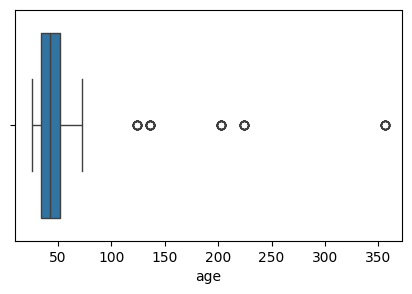

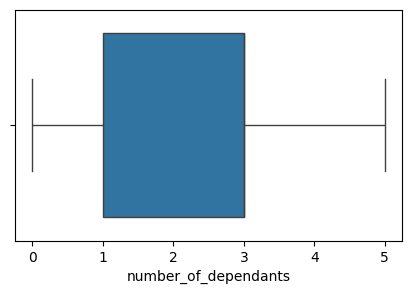

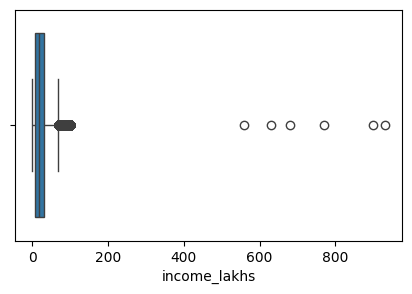

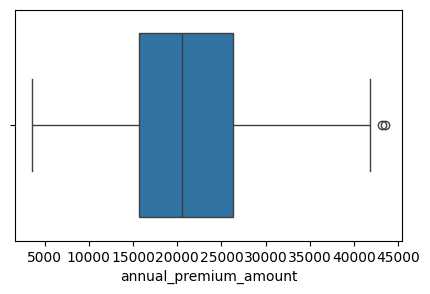

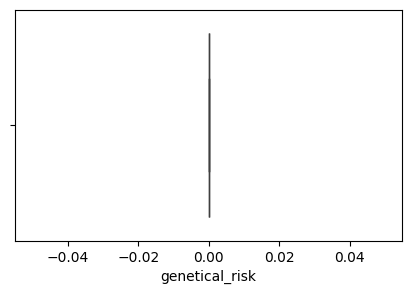

In [117]:
for col in numeric_columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x = df[col])
    plt.show()

In [118]:
df[df.age>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [119]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,43.095380,2.387790,23.371530,20901.900563,0.0
std,11.041991,1.420641,24.751262,6928.457636,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15706.000000,0.0
50%,42.000000,3.000000,17.000000,20496.000000,0.0
75%,52.000000,3.000000,32.000000,26361.000000,0.0
max,72.000000,5.000000,930.000000,43471.000000,0.0


<Axes: xlabel='income_lakhs', ylabel='Count'>

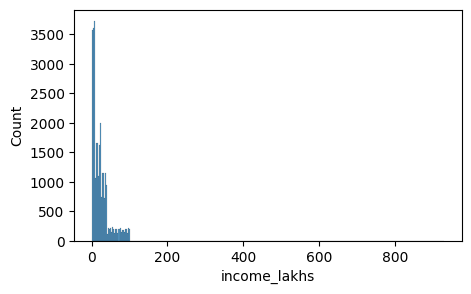

In [120]:
plt.figure(figsize=(5,3))
sns.histplot(df1.income_lakhs)

##### Lets use IQR(InterQuertile Range) method to treat outlier in the income_lakhs column

In [121]:
df1.income_lakhs.quantile([0.25,0.75])

0.25     7.0
0.75    32.0
Name: income_lakhs, dtype: float64

In [122]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [123]:
df1[df1.income_lakhs > quantile_threshold].shape ### As there as no many records we can drop them.

(6, 14)

In [124]:
df2 = df1[df1.income_lakhs <= quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


##### Lets analyse the disribution of the numeric data columns in our datset:

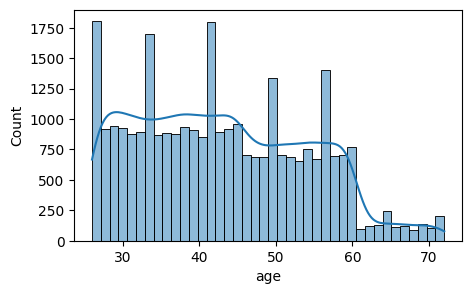

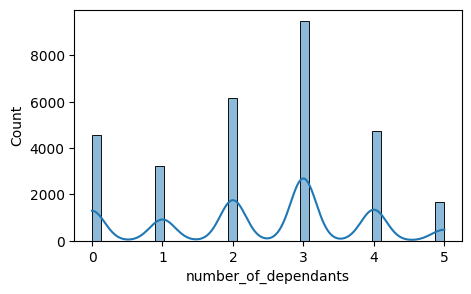

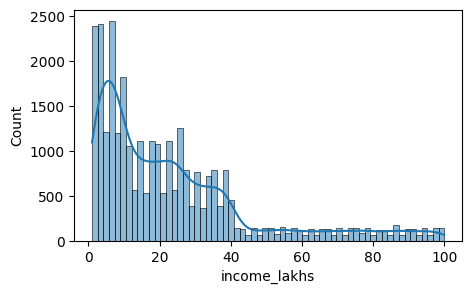

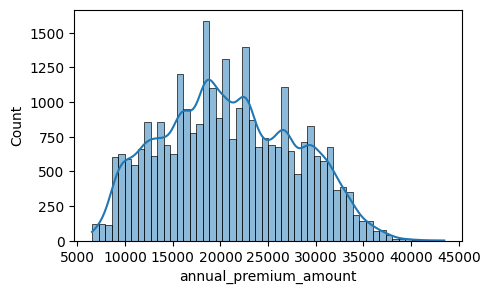

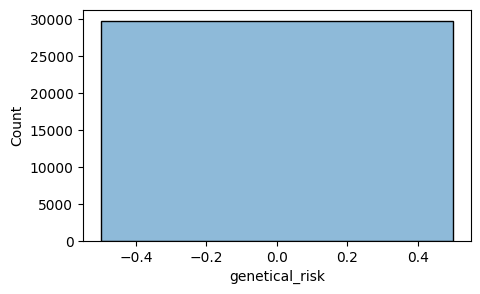

In [125]:
for col in numeric_columns:
    plt.figure(figsize=(5,3))
    sns.histplot(df2[col],kde = True)
    plt.show()

##### We can make the visuals like this also.

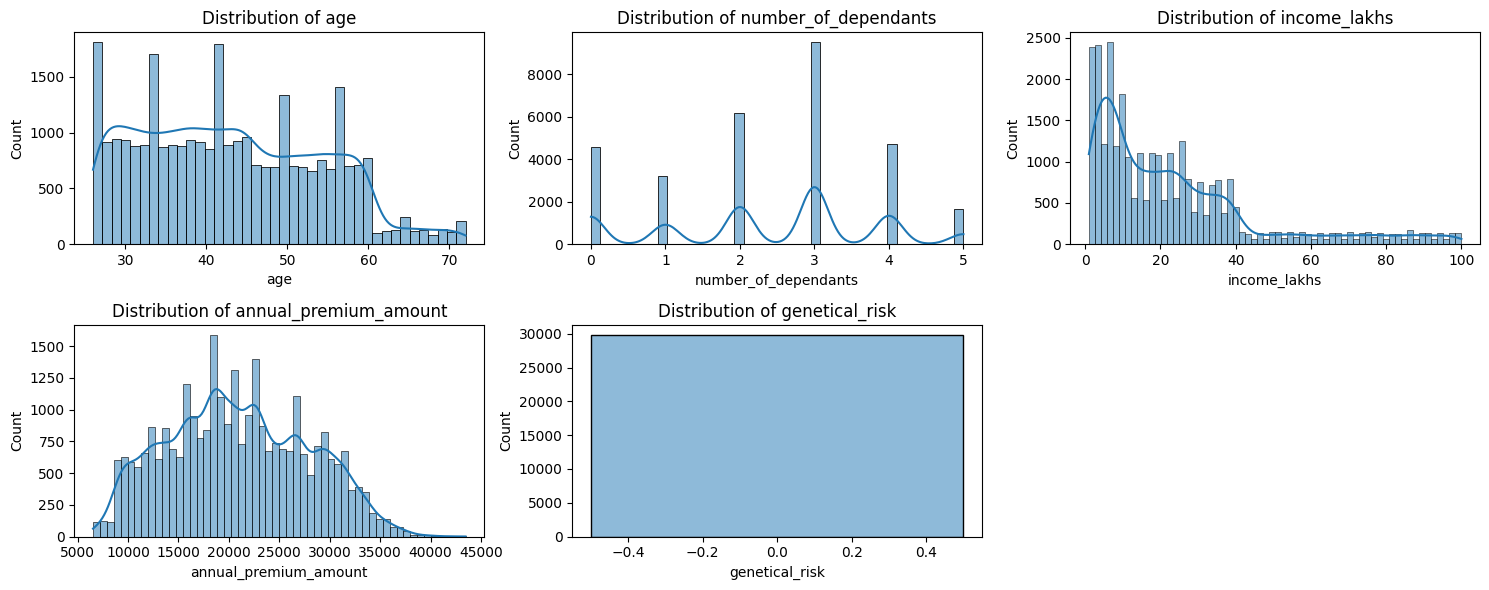

In [126]:
cols_to_plot = numeric_columns[:5]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 6))

# Flatten axes array for easy indexing
axs = axs.flatten()

# Plot each histogram
for i, col in enumerate(cols_to_plot):
    sns.histplot(df2[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')

# Hide the last unused subplot (if any)
if len(cols_to_plot) < len(axs):
    for j in range(len(cols_to_plot), len(axs)):
        axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

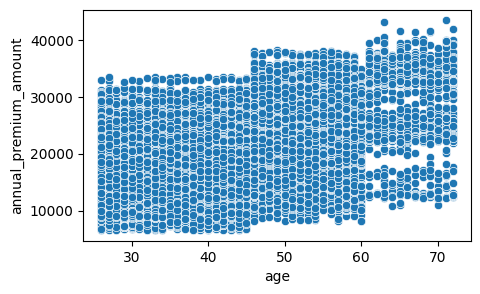

In [26]:
plt.figure(figsize=(5,3))
sns.scatterplot(df2, x='age' , y= 'annual_premium_amount')
plt.show()

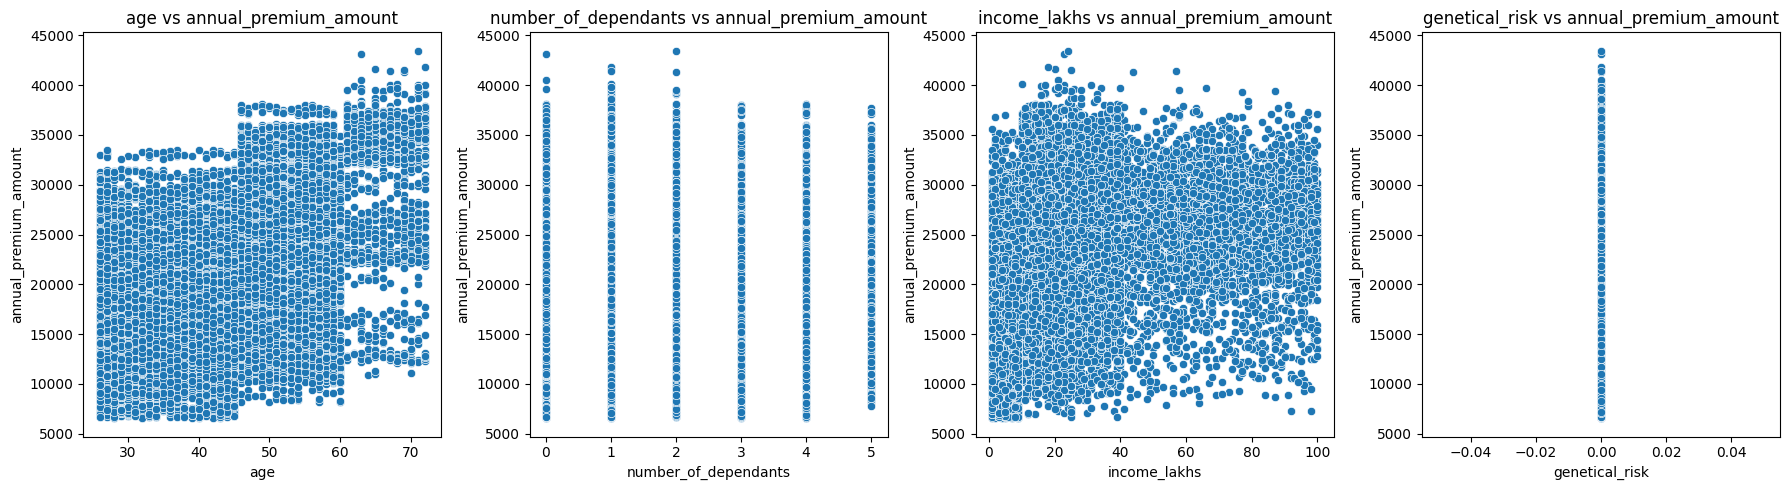

In [128]:
independent_vars = ['age', 'number_of_dependants', 'income_lakhs','genetical_risk']
dependent_var = 'annual_premium_amount'

# Create 1 row with 3 scatterplots
fig, axs = plt.subplots(1, 4, figsize=(18, 5))

# Loop through independent variables and plot
for i, col in enumerate(independent_vars):
    sns.scatterplot(data=df2, x=col, y=dependent_var, ax=axs[i])
    axs[i].set_title(f'{col} vs {dependent_var}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel(dependent_var)

# Adjust layout
plt.tight_layout()
plt.show()

##### Now Let's Analyse the Categorical columns:

In [129]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0


In [130]:
categorical_columns = df2.select_dtypes(include='object').columns.tolist()
print(categorical_columns)

['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']


In [131]:
for col in categorical_columns:
    print(col, ":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [132]:
df2['smoking_status']= df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke' :'No Smoking',
    'Not Smoking': 'No Smoking'
})
df2.smoking_status.unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [133]:
df2.gender.value_counts()

gender
Male      16376
Female    13446
Name: count, dtype: int64

In [134]:
pct_count= df2.gender.value_counts(normalize=True)
pct_count

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64

In [135]:
pct_count.values

array([0.54912481, 0.45087519])

In [136]:
pct_count.index

Index(['Male', 'Female'], dtype='object', name='gender')

<Axes: xlabel='gender'>

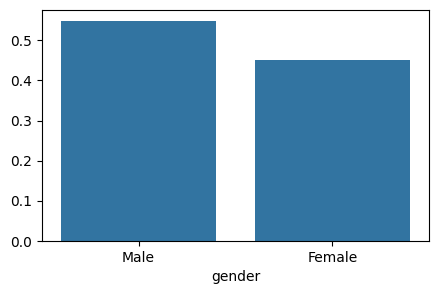

In [137]:
plt.figure(figsize=(5,3))
sns.barplot(x=pct_count.index, y=pct_count.values)

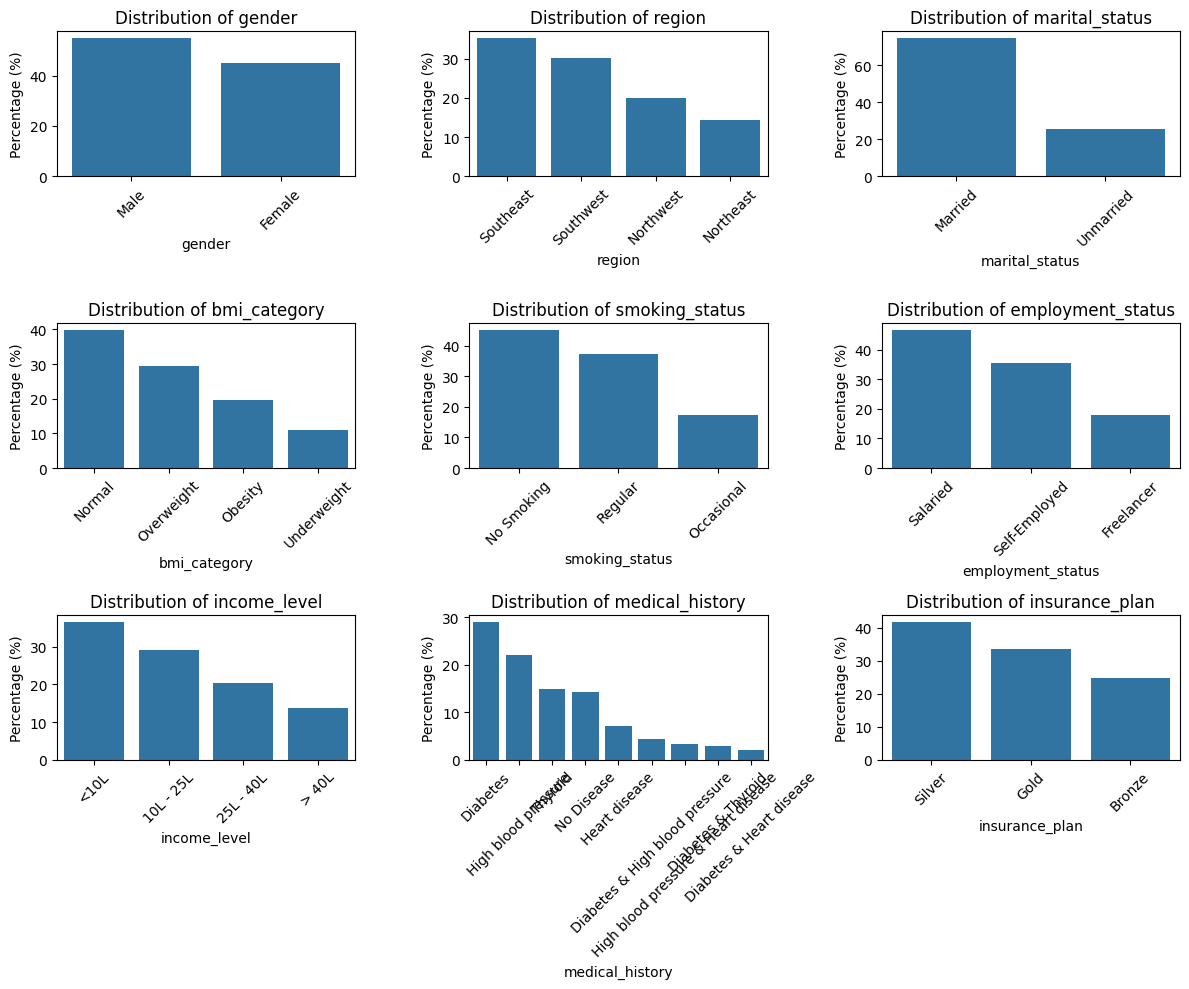

In [138]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.flatten()  # Flatten to 1D for easy indexing

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    pct_count = df2[col].value_counts(normalize=True) * 100  # percentage
    sns.barplot(x=pct_count.index, y=pct_count.values, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_ylabel('Percentage (%)')
    axs[i].set_xlabel(col)
    axs[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots (in case fewer than 9 columns)
for j in range(len(categorical_columns), len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()

##### In terms of Bivariate analysis If i wanna know the relation between two categorical columns i can use crosstab function of pandas

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


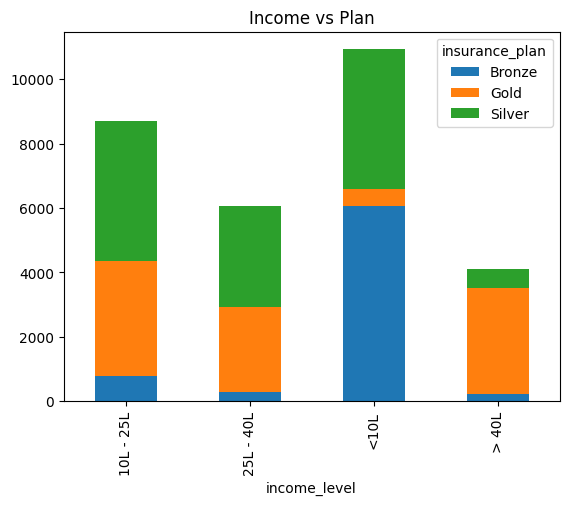

In [139]:
crosstab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
print(crosstab)
crosstab.plot(kind='bar',stacked = True)
plt.title('Income vs Plan')
plt.show()

##### We can also use heatmap for visualize this as:

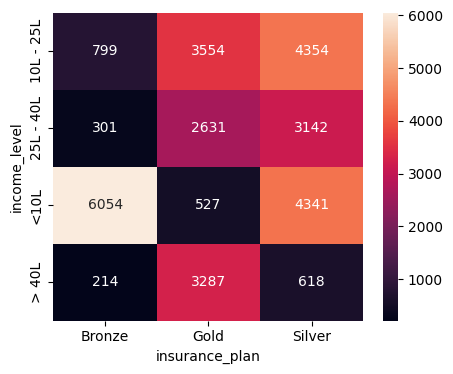

In [140]:
plt.figure(figsize=(5,4))
sns.heatmap(crosstab, annot= True, fmt= 'd')
plt.show()

### Feature Engineering

In [141]:
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


In [142]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [143]:
risk_scores= {
    'diabetes':6,
    'heart disease':8,
    'high blood pressure': 6,
    'thyroid':5,
    'no disease': 0,
    'none':0
}

df2[['disease1','disease2']] = df2['medical_history'].str.split(" & ", expand= True).apply(lambda x: x.str.lower())
df2.sample(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
5028,51,Male,Northwest,Married,2,Obesity,No Smoking,Self-Employed,<10L,3,No Disease,Bronze,12510,0,no disease,None
18153,26,Male,Northwest,Married,3,Overweight,No Smoking,Self-Employed,> 40L,54,Diabetes & Thyroid,Silver,19194,0,diabetes,thyroid
937,31,Male,Southwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,60,High blood pressure,Gold,27460,0,high blood pressure,None


In [144]:
#df2['disease1'].fillna('none',inplace =True)
#df2['disease2'].fillna('none',inplace =True)

df2.fillna({'disease1':'none','disease2':'none'}, inplace = True)
df2.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
disease1                 0
disease2                 0
dtype: int64

In [145]:
df2['total_risk_score'] = 0

for disease in ['disease1','disease2']:
    df2['total_risk_score'] +=  df2[disease].map(risk_scores) 

### Normalize the total_risk_column here only:
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score)/(max_score - min_score)
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571


##### Label Encoding for the Ordinal Columns

In [146]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [147]:
#### Let'sdo label encoding for insurance_plan column:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
df2.insurance_plan.unique()

array([1, 2, 3])

In [148]:
#### Doing same for income_label:

df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [149]:
df2['income_level'] = df2['income_level'].map({
    '<10L': 1,
    '10L - 25L': 2,
    '25L - 40L': 3,
    '> 40L': 4
})
df2['income_level'].unique()

array([1, 2, 4, 3])

In [150]:
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,0,high blood pressure,none,6,0.428571


##### One Hot Encoding for the Nominal Columns

In [151]:
nominal_cols = ['gender', 'region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2, columns= nominal_cols, drop_first=True, dtype=int)

In [152]:
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1


In [153]:
df3.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount',
       'genetical_risk', 'disease1', 'disease2', 'total_risk_score',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [154]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head(3)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1


##### Plotting the correlation Matrix:

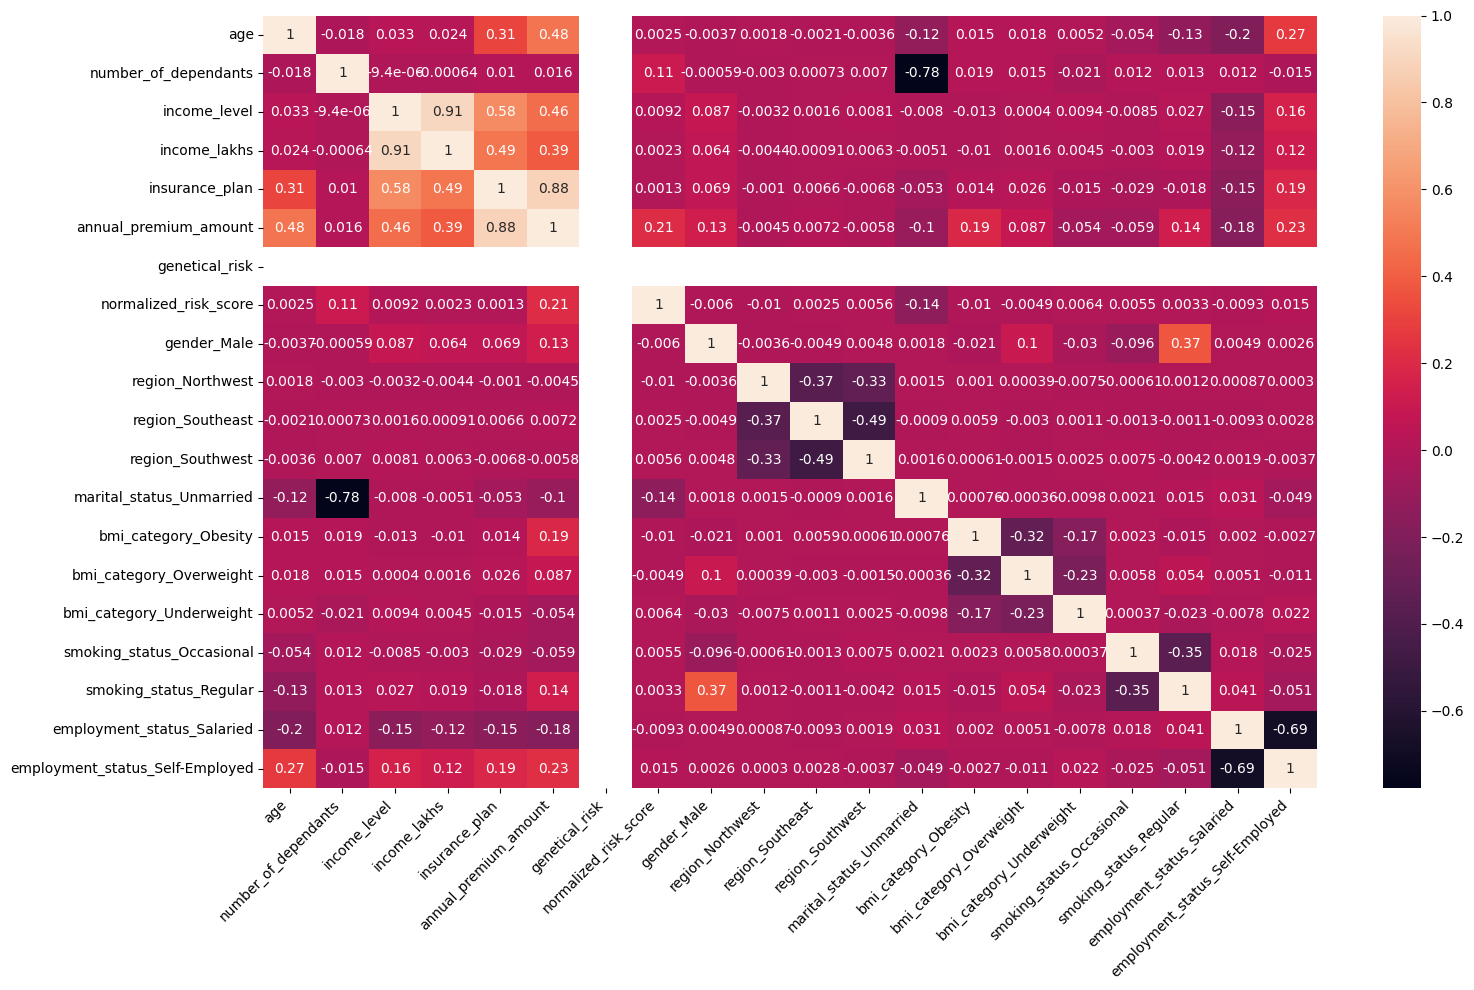

In [155]:
cm = df4.corr()

plt.figure(figsize=(16,10))
sns.heatmap(cm,annot= True)
plt.xticks(rotation =45, ha='right')
plt.yticks(rotation =0)
plt.tight_layout()
plt.show()

##### We can select the features for our model using this correlation matrix but VIF is a better solution for feature selection:

In [156]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


In [157]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

### Let's do scaling
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.000000,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.000000,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.333333,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,1.000000,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.333333,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
   vif_df = pd.DataFrame()
   vif_df['Feature'] = data.columns
   vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
   return vif_df

In [159]:
calculate_vif(X)

C:\Users\Prabal Kumar Deka\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Feature,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_risk_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


In [161]:
calculate_vif(X.drop('income_level', axis='columns'))

C:\Users\Prabal Kumar Deka\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Feature,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,genetical_risk,NaN
5,normalized_risk_score,3.808345
6,gender_Male,2.591439
7,region_Northwest,2.123277
8,region_Southeast,2.979899
9,region_Southwest,2.708641


In [162]:
X_reduced = X.drop('income_level', axis='columns')
X_reduced.head(10)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1
5,0.152174,0.6,0.030303,0.5,0.0,0.857143,1,0,1,0,0,0,0,0,0,1,0,1
6,0.369565,0.6,0.454545,1.0,0.0,0.357143,1,0,0,0,0,0,1,0,0,1,1,0
7,0.717391,0.0,0.202020,1.0,0.0,0.000000,0,0,1,0,1,0,1,0,0,0,0,0
8,0.434783,0.8,0.202020,1.0,0.0,0.357143,0,0,1,0,0,0,0,0,1,0,0,1
9,0.913043,0.2,0.000000,0.0,0.0,0.428571,0,0,0,1,0,0,0,0,0,0,0,1


#### Model Training:

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state= 10)

print('x_train:', X_train.shape)
print('x_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (20875, 18)
x_test: (8947, 18)
y_train: (20875,)
y_test: (8947,)


In [164]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score, test_score

(0.9534163989489616, 0.9538448451629948)

In [165]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ===> MSE: ",mse_lr,"RMSE: ",rmse_lr)

Linear Regression ===> MSE:  2183844.3603124553 RMSE:  1477.783597253825


In [166]:
model_lr.intercept_

np.float64(5935.981289344605)

In [167]:
model_lr.coef_

array([ 7.01623933e+03, -1.31176470e+03, -7.08193369e+02,  1.48359882e+04,
       -4.54747351e-12,  6.05362412e+03,  3.75582688e+01, -5.52508721e+01,
       -1.96225429e+01, -2.22896756e+01, -7.00320200e+02,  3.92681271e+03,
        1.97945605e+03,  6.12866236e+02,  8.37395101e+02,  2.80066184e+03,
       -4.54913671e+01,  2.43078421e+02])

##### We can show this coefficients in a horizontal bar chart to visualize how much it contributes to the final prediction.

In [168]:
X_test.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
19713,0.652174,0.0,0.262626,1.0,0.0,0.428571,0,0,0,1,1,0,0,0,0,0,0,1
14750,0.000000,0.8,0.101010,0.5,0.0,1.000000,0,0,0,1,0,0,0,1,0,1,1,0


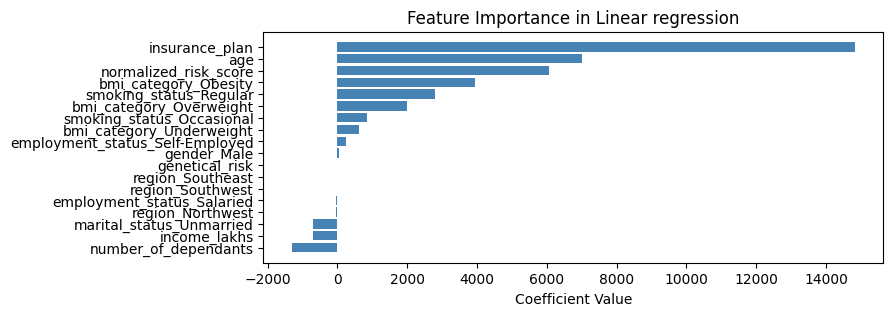

In [169]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances, index= X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by= 'Coefficients', ascending = True)


plt.figure(figsize =(8,3))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear regression')
plt.show()

##### Checking Score with Ridge() Model

In [170]:
model_rg = Ridge()
model_rg.fit(X_train, y_train)
train_score = model_rg.score(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score, test_score

(0.9534162332209687, 0.9538456995663842)

##### Going with XGBoost

In [171]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
train_score = model_xgb.score(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)
train_score, test_score

(0.9986370801925659, 0.9979538321495056)

In [172]:
y_pred = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBRegressor ===> MSE: ",mse_xgb,"RMSE: ",rmse_xgb)

XGBRegressor ===> MSE:  96814.2109375 RMSE:  311.14982072548264


##### Using RandomizedSearchCV for hyperparameter tuning:

In [173]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators':[20,40,50],
    'learning_rate':[0.01, 0.1, 0.2],
    'max_depth':[3,4,5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42)
random_search.fit(X_train,y_train)
print(random_search.best_score_)
print(random_search.best_params_)

0.9970577955245972
{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}


In [174]:
best_model = random_search.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)

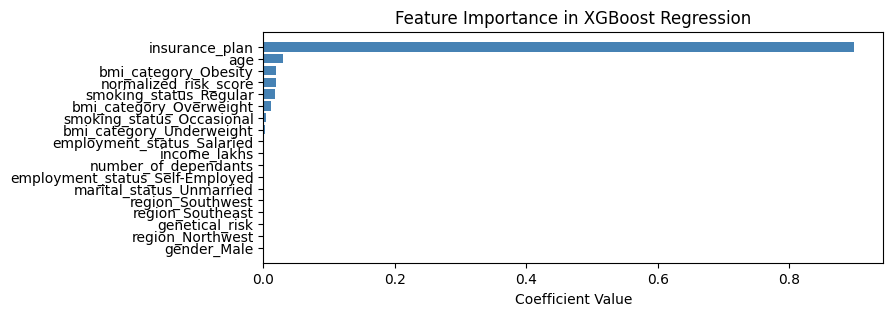

In [175]:
feature_importances = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importances, index= X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by= 'Coefficients', ascending = True)

plt.figure(figsize =(8,3))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost Regression')
plt.show()

### Error Analysis:

In [176]:
y_pred = best_model.predict(X_test)
residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

result_df= pd.DataFrame({
    'actuals': y_test,
    'predicted':y_pred,
    'diff': residuals,
    'diff_pct':residuals_pct
})
result_df.head()

,actuals,predicted,diff,diff_pct
19713,26895,26691.470703,-203.529297,-0.756755
14750,22734,22650.751953,-83.248047,-0.366183
19932,21198,21581.894531,383.894531,1.810994
29643,9100,9425.934570,325.934570,3.581699
17076,26434,26691.470703,257.470703,0.974013


<Axes: xlabel='diff_pct', ylabel='Count'>

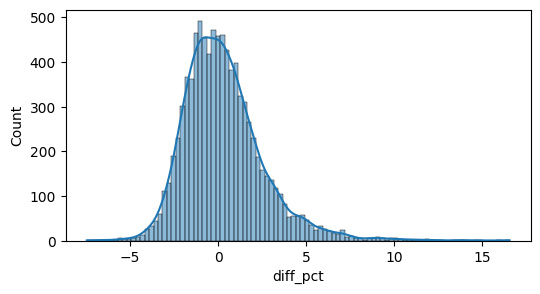

In [177]:
plt.figure(figsize=(6,3))
sns.histplot(result_df['diff_pct'], kde = True)

##### We have decided that the maximum error should be less than 10%.

In [178]:
extreme_error_threshold = 10
extreme_results_df = result_df[np.abs(result_df.diff_pct)>extreme_error_threshold]
extreme_results_df.shape

(29, 4)

In [179]:
result_df.shape

(8947, 4)

In [180]:
#### Finding the percentage of extreme errors:

extreme_error_pct = extreme_results_df.shape[0]*100/result_df.shape[0]
extreme_error_pct

0.32413099362914943

##### Now I want to find where exactly is the problem:

In [181]:
extreme_results_df.index

Index([14286, 27518,  9285,  7547, 21910, 12189, 21141, 16263,  8216, 13973,
        9150, 24145, 18522,  6163, 18681, 19145, 21455, 22666,  7508, 10741,
        6517, 18834, 13744, 24119,  2695, 25658, 11019, 14037,  7654],
      dtype='int64')

In [182]:
X_test.index

Index([19713, 14750, 19932, 29643, 17076, 20314, 24893, 26722, 25844, 10731,
       ...
       10637,  1224, 17046, 19228,  9275,  3387,  7858,  9744,  4849,  8986],
      dtype='int64', length=8947)

In [183]:
extreme_errors_df = X_test.loc[extreme_results_df.index] ### SO these are the rows that have high margin errors.
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
14286,0.021739,0.6,0.050505,0.0,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,1,0
27518,0.304348,0.6,0.080808,0.0,0.0,0.357143,1,1,0,0,0,0,0,0,0,0,0,1
9285,0.326087,0.6,0.010101,0.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
7547,0.347826,0.2,0.080808,0.0,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,1,0
21910,0.043478,0.6,0.020202,0.0,0.0,0.000000,1,0,1,0,0,0,0,0,0,0,0,0


##### Here we can see that the Age column has some problem

#### Reverse Scaling

In [186]:
extreme_errors_df['income_level']=-1

In [187]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
0,27.0,3.0,-2.0,6.0,1.0,0.0
1,40.0,3.0,-2.0,9.0,1.0,0.0
2,41.0,3.0,-2.0,2.0,1.0,0.0
3,42.0,1.0,-2.0,9.0,1.0,0.0
4,28.0,3.0,-2.0,3.0,1.0,0.0


In [189]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan',
 'genetical_risk']

#### Export the Model

In [191]:
from joblib import dump

dump(best_model, 'artifacts/model_rest.joblib')

scaler_with_cols ={
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}

dump(scaler_with_cols, 'artifacts/scaler_rest.joblib')

['artifacts/scaler_rest.joblib']